In [246]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm.auto import tqdm

In [247]:
col_name = ['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
            'deg-malig', 'breast', 'breast-quad', 'irradiat']

df = pd.read_csv('breast-cancer.data', delimiter=',', names = col_name)

def operation(str):
    if str=="yes":
        return 1
    else:
        return 0

def op1(str):
    if str=="left":
        return 1
    else:
        return 0

def op2(str):
    if str=="left-up":
        return 1
    elif str=="left-low":
        return 2
    elif str=="right-up":
      return 3
    elif str=="right-low":
      return 4
    else :
      return 5

def med(x):
  return int(x[0:2])+5

def medi(x):
  if len(x) == 3:
    return int(x[0])+2
  else:
    return int(x[0:2])+2

def mdi(x):
  if len(x) <= 4:
    return int(x[0])+1
  else:
    return int(x[0:2])+1

def plopl(x):
  if x=="lt40":
    return 1
  elif x=="ge40":
    return 2
  else:
    return 3

def op21(str):
    if str=="recurrence-events":
        return 1
    else:
        return 0

print(df)
df['node-caps'] = df['node-caps'].apply(operation)
df['irradiat'] = df['irradiat'].apply(operation)
df['breast'] = df['breast'].apply(op1)
df['breast-quad'] = df['breast-quad'].apply(op2)
df['age'] = df['age'].apply(med)
df['tumor-size']=df['tumor-size'].apply(medi)
df['inv-nodes']=df['inv-nodes'].apply(mdi)
df['menopause']=df['menopause'].apply(plopl)
df['class']=df['class'].apply(op21)
print(df.head(20))

                    class    age menopause tumor-size inv-nodes node-caps  \
0    no-recurrence-events  30-39   premeno      30-34       0-2        no   
1    no-recurrence-events  40-49   premeno      20-24       0-2        no   
2    no-recurrence-events  40-49   premeno      20-24       0-2        no   
3    no-recurrence-events  60-69      ge40      15-19       0-2        no   
4    no-recurrence-events  40-49   premeno        0-4       0-2        no   
..                    ...    ...       ...        ...       ...       ...   
281     recurrence-events  30-39   premeno      30-34       0-2        no   
282     recurrence-events  30-39   premeno      20-24       0-2        no   
283     recurrence-events  60-69      ge40      20-24       0-2        no   
284     recurrence-events  40-49      ge40      30-34       3-5        no   
285     recurrence-events  50-59      ge40      30-34       3-5        no   

     deg-malig breast breast-quad irradiat  
0            3   left    left_

In [248]:
# col_name = ['class' , 'Alcohol' , 'Malic acid' , 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids'
#             ,'Nonflavanoid phenols' , 'Proanthocyanins' , 'Color intensity', 'Hue', 'OD280/OD315', 'Proline']

# df = pd.read_csv('wine.data', delimiter=',', names = col_name)

# def pl(x):
#   return x-1

# df['class']=df['class'].apply(pl)


In [249]:
df.dtypes

class          int64
age            int64
menopause      int64
tumor-size     int64
inv-nodes      int64
node-caps      int64
deg-malig      int64
breast         int64
breast-quad    int64
irradiat       int64
dtype: object

In [250]:
df.describe()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.0,286.000000
mean,0.297203,51.643357,2.500000,26.405594,2.573427,0.195804,2.048951,0.531469,5.0,0.237762
std,0.457828,10.118183,0.547723,10.529649,3.451904,0.397514,0.738217,0.499883,0.0,0.426459
min,0.000000,25.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,5.0,0.000000
25%,0.000000,45.000000,2.000000,22.000000,1.000000,0.000000,2.000000,0.000000,5.0,0.000000
50%,0.000000,55.000000,3.000000,27.000000,1.000000,0.000000,2.000000,1.000000,5.0,0.000000
75%,1.000000,55.000000,3.000000,32.000000,4.000000,0.000000,3.000000,1.000000,5.0,0.000000
max,1.000000,75.000000,3.000000,52.000000,25.000000,1.000000,3.000000,1.000000,5.0,1.000000


In [251]:
# Data to numpy arrays
X = df.iloc[:, 1:10].to_numpy().astype(np.float32)
y = df.iloc[:, 0].to_numpy()
X[:10], y[:10]
# print(y)

(array([[35.,  3., 32.,  1.,  0.,  3.,  1.,  5.,  0.],
        [45.,  3., 22.,  1.,  0.,  2.,  0.,  5.,  0.],
        [45.,  3., 22.,  1.,  0.,  2.,  1.,  5.,  0.],
        [65.,  2., 17.,  1.,  0.,  2.,  0.,  5.,  0.],
        [45.,  3.,  2.,  1.,  0.,  2.,  0.,  5.,  0.],
        [65.,  2., 17.,  1.,  0.,  2.,  1.,  5.,  0.],
        [55.,  3., 27.,  1.,  0.,  2.,  1.,  5.,  0.],
        [65.,  2., 22.,  1.,  0.,  1.,  1.,  5.,  0.],
        [45.,  3., 52.,  1.,  0.,  2.,  1.,  5.,  0.],
        [45.,  3., 22.,  1.,  0.,  2.,  0.,  5.,  0.]], dtype=float32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [252]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [253]:
# Scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [254]:
# Converting data to tensors.
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train).type(torch.float32)
y_test = torch.from_numpy(y_test).type(torch.float32)

In [255]:
X_train.shape, y_train.shape

(torch.Size([228, 9]), torch.Size([228]))

In [256]:
# Creating linear regression model
model = nn.Linear(9, 1)
model.state_dict()  # Shows model parameters

OrderedDict([('weight',
              tensor([[-0.1837, -0.1084, -0.0494, -0.2760, -0.2232,  0.1918,  0.1422, -0.2571,
                        0.0017]])),
             ('bias', tensor([-0.2813]))])

In [257]:
# Setting up loss and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.01,
                            momentum=0.7)

In [258]:
# Training
EPOCHS = 1000
train_losses = []
test_losses = []

for epoch in tqdm(range(EPOCHS)):

  ### Training
  model.train()

  # Forward Propagation
  y_pred = model(X_train).squeeze(dim=1)

  # Loss Value
  loss = loss_fn(y_pred, y_train)
  train_losses.append(loss.item())

  # Set gradients to zero
  optimizer.zero_grad()

  # Backpropagation on loss
  loss.backward()

  # Update parameters
  optimizer.step()

  ### Testing
  model.eval()
  with torch.inference_mode():
    test_preds = model(X_test).squeeze(dim=1)
    test_loss = loss_fn(test_preds, y_test)
    test_losses.append(test_loss.item())

    if(epoch%10 == 0):
      print(f'Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 0.817029595375061 | Test Loss: 0.9028369188308716
Epoch: 10 | Train Loss: 0.32523930072784424 | Test Loss: 0.4172404408454895
Epoch: 20 | Train Loss: 0.20303595066070557 | Test Loss: 0.2776498794555664
Epoch: 30 | Train Loss: 0.17835398018360138 | Test Loss: 0.23864078521728516
Epoch: 40 | Train Loss: 0.17278365790843964 | Test Loss: 0.22582979500293732
Epoch: 50 | Train Loss: 0.1712605357170105 | Test Loss: 0.22045378386974335
Epoch: 60 | Train Loss: 0.170724555850029 | Test Loss: 0.21770688891410828
Epoch: 70 | Train Loss: 0.17048627138137817 | Test Loss: 0.2160874903202057
Epoch: 80 | Train Loss: 0.17036151885986328 | Test Loss: 0.21502895653247833
Epoch: 90 | Train Loss: 0.1702898144721985 | Test Loss: 0.21428599953651428
Epoch: 100 | Train Loss: 0.1702464520931244 | Test Loss: 0.21373973786830902
Epoch: 110 | Train Loss: 0.1702195703983307 | Test Loss: 0.2133260816335678
Epoch: 120 | Train Loss: 0.17020268738269806 | Test Loss: 0.21300695836544037
Epoch: 130

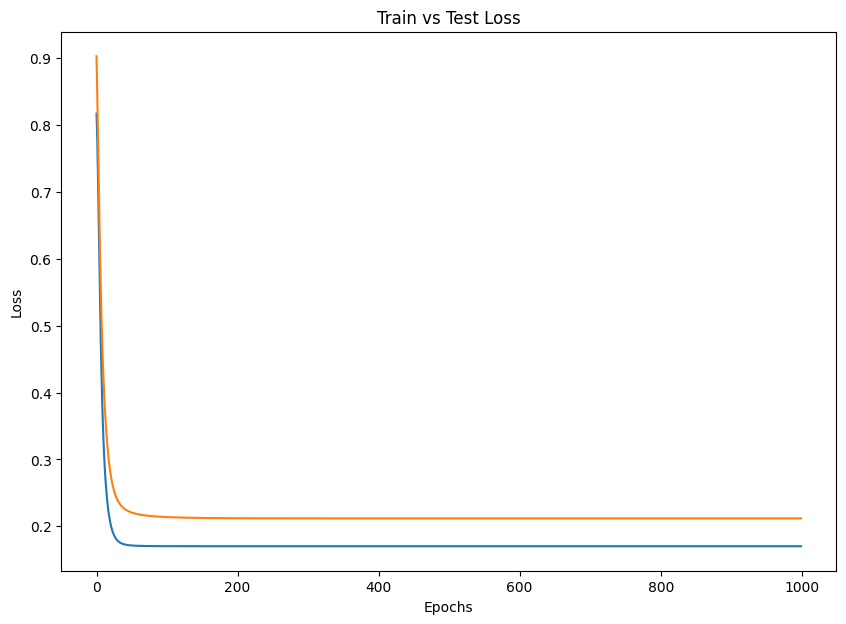

In [259]:
# Plotting train and test loss against each other
plt.figure(figsize=(10,7))
plt.plot(train_losses)
plt.plot(test_losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train vs Test Loss");

In [260]:
# Accuracy Function for evaluation.
def acc_fn(y_true, y_preds):
  print(y_preds.dtype)
  print(y_true.dtype)
  print(y_preds.squeeze().shape,y_true.shape)
  correct = torch.eq(y_true, y_preds.squeeze()).sum().item()
  print(torch.eq(y_true, y_preds.squeeze()).shape)
  acc = correct / len(y_preds)
  return acc*100

In [261]:
# Making predictions with our model
model.eval()
with torch.inference_mode():
  preds = model(X_test)
  preds = torch.round(preds)
  print(preds.shape)
  print(X_test.shape)
  print(y_test.shape)
print(f'Test Accuracy: {acc_fn(y_test, preds)}')

torch.Size([58, 1])
torch.Size([58, 9])
torch.Size([58])
torch.float32
torch.float32
torch.Size([58]) torch.Size([58])
torch.Size([58])
Test Accuracy: 65.51724137931035
